---
# Space Syntax analysis in Python

## 2. Loading spatial data
---

For detailed explanation of the origins of this document read the first part "1. Basic functionality"

This part demonstrates how to load and display spatial data. For this, instead of Pandas, we will switch to the GeoPandas, an extension of Pands for handling geospatial data. GeoPandas provides GeoDataFrames instead of plain DataFrames, i.e. something akin to excel sheets but which also contain geographic coordinates of points, lines or other such objects. Each row comes with a different geographic object.

---
We first have to load some libraries to enable core geographic analysis and plotting

In [1]:
# Load pandas, the DataFrame and data handling library and from now on refer to it as "pd"
import pandas as pd

# Load geopandas, the GeoDataFrame and geospatial data handling library and from now on refer to it as "gpd"
import geopandas as gpd

# Load the pyplot module from the matplotlib library for plotting, refer to it as "plt"
import matplotlib.pyplot as plt

# Load numpy, the array and matrix library useful for various computations, referred as "np"
import numpy as np

# Load various modules from shapely, the library to handle shapes
from shapely.geometry import Point

/home/petros/.local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


---
A quick example: Read and plot the classic barnsbury axial map from a pair of MID/MIF files. We can plot the particular map at a different size. More information about plotting can be found [here]( https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) and [here](https://geopandas.org/en/stable/docs/user_guide/mapping.html)

<AxesSubplot:>

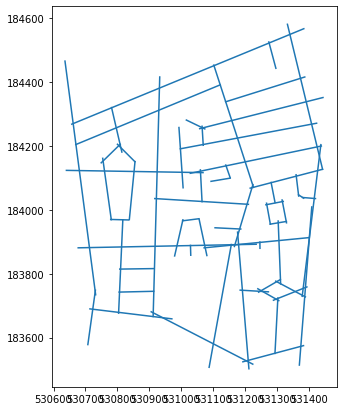

In [2]:
barnsburySmall = gpd.read_file("data/barnsbury/barnsbury_small_axial.mid")
barnsburySmall.plot(figsize=(7, 7))

---
Reading spatial data produces a GeoDataFrame (in this case containing lines and their attributes). These GeoDataFrames can be examined to see the data or the coordinates. To see a few of the attributes print the GeoDataFrame with ".head()" which will work in the same as any plain DataFrame.

In [3]:
barnsburySmall.head(5)

,Depthmap_Ref,Choice,Choice_Line_Length_Wgt_,Choice_Line_Length_Wgt_Norm_,Choice_Norm_,Connectivity,Integration_HH_,Line_Length,Mean_Depth,Mean_Depth_Line_Length_Wgt_,Node_Count,RA,Total_Depth,Total_Line_Length,geometry
0,0,182.0,17580946.0,0.184803,0.102825,5.0,1.873255,743.125120,2.850000,2.212653,61.0,0.062712,171.0,13793.731,"LINESTRING (530635.69627 184468.67565, 530732...."
1,1,360.0,25343200.0,0.266396,0.203390,6.0,1.943284,791.056700,2.783333,2.150709,61.0,0.060452,167.0,13793.731,"LINESTRING (530655.08041 184267.84313, 531386...."
2,2,151.0,5913097.0,0.062156,0.085311,4.0,1.350204,147.843480,3.566667,2.968181,61.0,0.087006,214.0,13793.731,"LINESTRING (530781.41948 184322.99735, 530814...."
3,3,123.0,10576759.0,0.111178,0.069492,4.0,1.762130,494.453860,2.966667,2.378288,61.0,0.066667,178.0,13793.731,"LINESTRING (530667.76131 184203.90144, 531124...."
4,4,10.0,1522733.6,0.016006,0.005650,3.0,1.060874,81.982307,4.266667,3.711566,61.0,0.110734,256.0,13793.731,"LINESTRING (530798.72586 184207.39044, 530856...."


---
To see the columns of the GeoDataFrame invoke .columns()

In [4]:
barnsburySmall.columns

Index(['Depthmap_Ref', 'Choice', 'Choice_Line_Length_Wgt_',
       'Choice_Line_Length_Wgt_Norm_', 'Choice_Norm_', 'Connectivity',
       'Integration_HH_', 'Line_Length', 'Mean_Depth',
       'Mean_Depth_Line_Length_Wgt_', 'Node_Count', 'RA', 'Total_Depth',
       'Total_Line_Length', 'geometry'],
      dtype='object')

---
To see the number of rows and columns in the GeoDataFrame we can invoke .shape

In [5]:
barnsburySmall.shape

(61, 15)

---
A simple scatterplot between two of the columns can be achieved with the function scatter() and by providing the two columns. The label of the x or y axis can also be provided. To see more plotting parameters [check this page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) 

Text(0, 0.5, 'Choice')

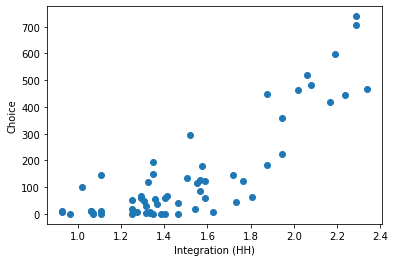

In [6]:
plt.scatter(barnsburySmall['Integration_HH_'], barnsburySmall['Choice'])
plt.xlabel("Integration (HH)")
plt.ylabel("Choice")

---
### Spatial Point Data
Spatial point data such as gatecounts can be loaded in the same way using gpd.read_file.

<AxesSubplot:>

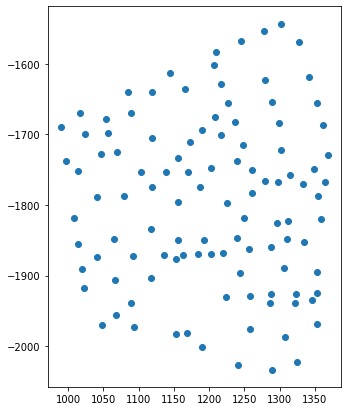

In [7]:
gateCounts = gpd.read_file("data/barnsbury/barnsbury_ped_gatecounts.mid")
gateCounts.plot(figsize=(7, 7))

---
An interesting function to apply to point data is the convex hull, a polygon that includes all points and is convex. This can be done using the command convex_hull. More manipulations can be found [here](https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html)


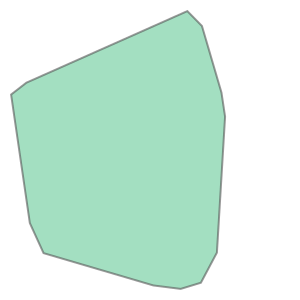

In [8]:
gateCountHull = gateCounts.unary_union.convex_hull
gateCountHull

---
We may also see the coordinates of the bounding box around all points using .bounds

In [9]:
# get the bounds for all points in this format: (xmin, ymin, xmax, ymax)
gateCounts.unary_union.bounds

(990.3315, -2033.145, 1367.995, -1542.85)

---
### Spatial Line Data

Spatial line data such as axial and segment maps can be loaded in the same way using gpd.read_file() which produces a GeoDataFrame with lines. Here let's load and plot a larger axial map of the Barnsbury area.

<AxesSubplot:>

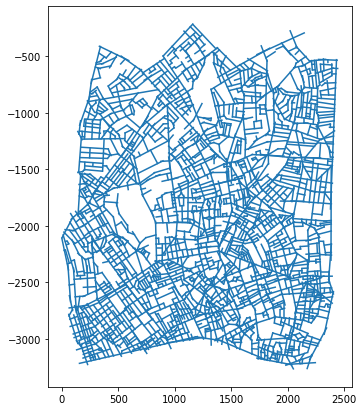

In [10]:
barnsburyAxial = gpd.read_file("data/barnsbury/barnsbury_axial.mid")
barnsburyAxial.plot(figsize=(7, 7))

---
To plot each line a different colour depending on a column from the GeoDataFrame we can provide the column to the plot function.

We may also provide a particular colour map, more of which can be found [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

For additional properties when plotting lines look [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html)

<AxesSubplot:>

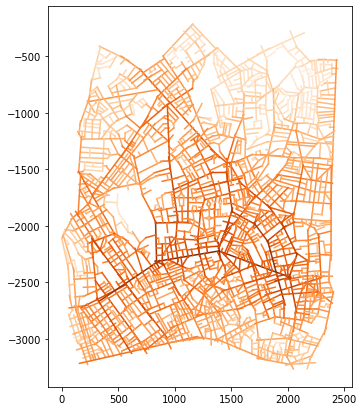

In [11]:
barnsburyAxial.plot(figsize=(7, 7), column='Integration', cmap='Oranges')

---
An interesting function that relates to the GeoDataFrames with lines is geometry.length() which takes the geometry from the GeoDataFrame and provides the length for each one

In [12]:
barnsburyAxial.geometry.length

0       378.169274
1       159.012578
2       396.188087
3       259.480250
4       244.476993
           ...    
1910     48.764741
1911     54.744863
1912    270.534656
1913    330.177225
1914    142.940547
Length: 1915, dtype: float64

---
Here we make a histogram of all line lengths:

(array([1.381e+03, 3.930e+02, 1.020e+02, 2.000e+01, 1.100e+01, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  19.20937271,  150.89760429,  282.58583586,  414.27406744,
         545.96229902,  677.65053059,  809.33876217,  941.02699374,
        1072.71522532, 1204.40345689, 1336.09168847]),
 <BarContainer object of 10 artists>)

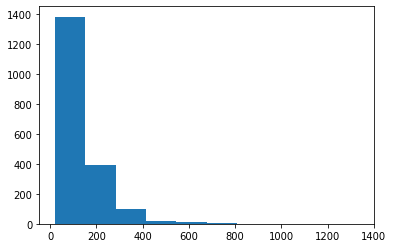

In [13]:
plt.hist(barnsburyAxial.geometry.length)

Two plots may also be overlaid by calling them one after the other and providing "add = TRUE" for all plots apart from the first. The first plot defines the plot limits. Here let's plot the large barnsbury map and add the gatecounts loaded previously:

<AxesSubplot:>

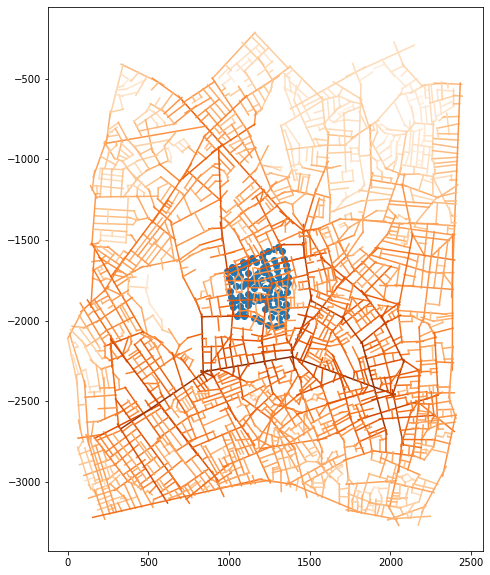

In [14]:
# prepare a new figure
fig, ax = plt.subplots(figsize=(10, 10))

# add the barnsbury map lines
barnsburyAxial.plot(ax=ax, column='Integration', cmap='Oranges')

# add the gatecount points
gateCounts.plot(ax=ax)

<AxesSubplot:>

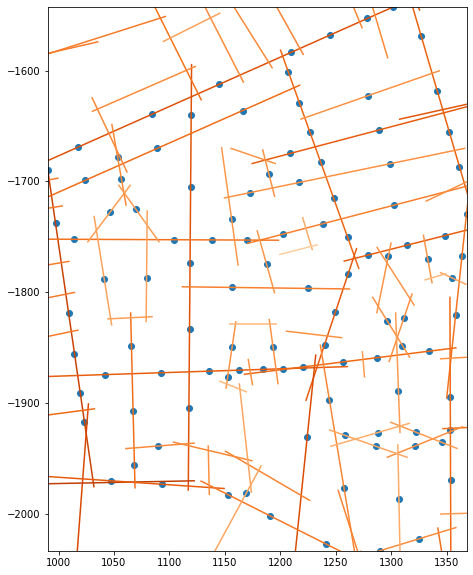

In [15]:
# prepare a new figure
fig, ax = plt.subplots(figsize=(10, 10))

# get the gatecount bounds
gcb = gateCounts.unary_union.bounds

ax.set_xlim([gcb[0], gcb[2]])
ax.set_ylim([gcb[1], gcb[3]])

barnsburyAxial.plot(ax=ax, column='Integration', cmap='Oranges')
gateCounts.plot(ax=ax)

---
### Spatial Polygon Data

Spatial polygon data such as urban plots and building rooms can be loaded in the same way using gpd.read_file() which produces a GeoDataFrame with polygons. Here let's load and plot some generated urban plots of the Barnsbury area.

<AxesSubplot:>

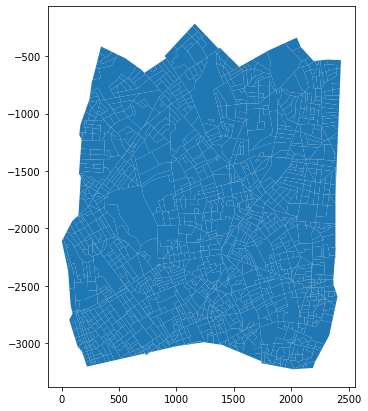

In [16]:
barnsburyPlots = gpd.read_file("data/barnsbury/barnsbury_plots.mid")
barnsburyPlots.plot(figsize=(7, 7))

---
Two useful functions for polygon data are .centroid which provides a GeoDataFrame with the centroids (points) of the polygons and .area which gives the area of the polygons. These will be provided as a single centroid or area for each polygon, otherwise "unary_union" should be provided first so that they will provide a single point and number for the whole set of polygons. Here we generate the centroid and area and plot the polygons coloured by area with the centroids marked with 'x' on top.

For the other types of markers available for points look [here](https://matplotlib.org/stable/api/markers_api.html).

For the other properties of the polygons look [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Polygon.html)

<AxesSubplot:>

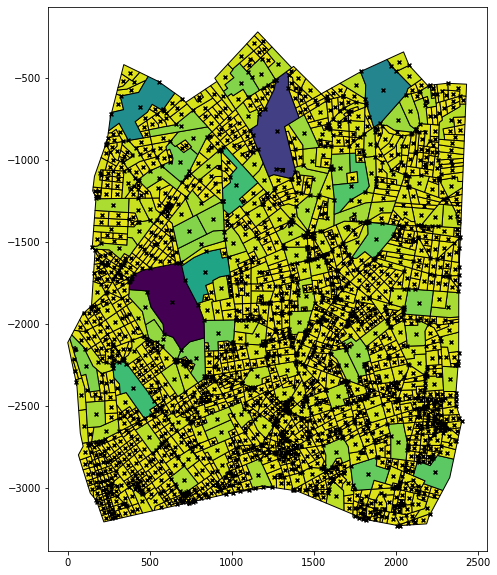

In [17]:
plotCentroids = barnsburyPlots.centroid
plotAreas = barnsburyPlots.area


# prepare a new figure
fig, ax = plt.subplots(figsize=(10, 10))

# plot the plots usind the areas
barnsburyPlots.plot(plotAreas, ax=ax, cmap = 'viridis_r', edgecolor='black')

plotCentroids.plot(markersize=15, marker='x', ax = ax, color = "black")



### Spatial Pixel Data

Spatial pixel data such as data from Visibility Graph Analysis (VGA) can be loaded in various ways to produce a GeoDataFrame with pixel data. Spatial pixels are essentially spatial points that are placed on a grid. A function "processPointMap()" is provided in the next cell to make loading these kinds of maps easier.

In [18]:
def refIDtoIndex(refID):
    i = refID >> 16;
    j = refID & 0x0000FFFF;
    return [i,j];
def processPointMap(filepath, scale = 1, sep = "\t"):
    pointMapData = pd.read_csv(filepath, sep=sep);
    pointMapData['x'] = pointMapData['x']*scale;
    pointMapData['y'] = pointMapData['y']*scale;
    ij = pd.DataFrame(np.transpose(refIDtoIndex(pointMapData['Ref'].values)), columns=['i', 'j'])
    pointMapData = pd.concat([pointMapData, ij], axis=1, sort=False)
    pointMapData['coords'] = list(zip(pointMapData.x, pointMapData.y))
    pointMapData['coords'] = pointMapData['coords'].apply(Point)
    dpm = gpd.GeoDataFrame( pointMapData[list(set(list(pointMapData)) - set(["x","y"]))], geometry='coords')
    return dpm;

---
Here let's load the classic National Gallery VGA, and display the first few rows from the attributes of each pixel.

In [19]:
galleryVGA = processPointMap("data/gallery/gallery_vga.csv", sep=',');
galleryVGA.head(5)

,Visual Integration [P-value],Point Second Moment,Visual Integration [Tekl],Connectivity,j,Visual Entropy,Point First Moment,Visual Node Count,Ref,Visual Relativised Entropy,Visual Integration [HH],i,Visual Mean Depth,coords
0,0.368697,11.320000,0.819784,91,56,1.887798,28.691513,4332,65592,2.772135,3.512031,1,3.704687,POINT (0.68000 7.04000)
1,0.372642,22.076799,0.820716,102,57,1.930077,38.375195,4332,65593,2.724683,3.549606,1,3.676056,POINT (0.68000 7.08000)
2,0.406066,62.731201,0.828319,135,58,1.970216,73.011009,4332,65594,2.578651,3.867989,1,3.455784,POINT (0.68000 7.12000)
3,0.406028,61.196800,0.828311,136,59,1.969768,72.054672,4332,65595,2.579243,3.867625,1,3.456015,POINT (0.68000 7.16000)
4,0.370977,26.406401,0.820323,106,60,1.923230,42.236126,4332,65596,2.736854,3.533751,1,3.688063,POINT (0.68000 7.20000)


---
We may now plot the map like in all the examples above

<AxesSubplot:>

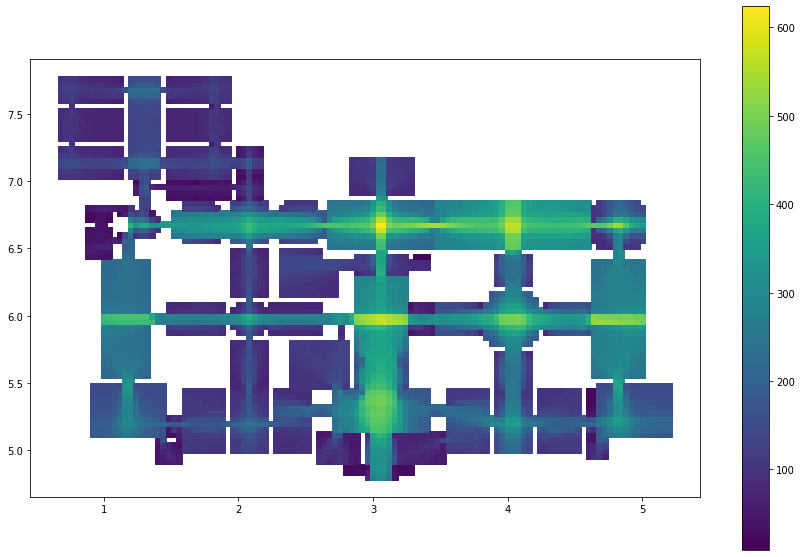

In [20]:
galleryVGA.plot(column='Connectivity', cmap='viridis', marker='s', markersize=33, legend=True, figsize=(15, 10))

---
We may also aggregate the attributes and see mean values

In [21]:
galleryVGA.aggregate("mean")

Visual Integration [P-value]    4.819169e-01
Point Second Moment             1.115533e+02
Visual Integration [Tekl]       8.422384e-01
Connectivity                    2.048587e+02
j                               3.297138e+01
Visual Entropy                  1.894771e+00
Point First Moment              1.097780e+02
Visual Node Count               4.332000e+03
Ref                             3.534635e+06
Visual Relativised Entropy      2.479927e+00
Visual Integration [HH]         4.590506e+00
i                               5.393375e+01
Visual Mean Depth               3.171338e+00
dtype: float64